# Descriptive Analysis of the 2019 Stack Overflow Developer Survey Data


by **Young Hun Ji**

May 3, 2021

*Note: This notebook is based on the capstone project submitted to Coursera in partial fulfillment of the requirements for the IBM DATA ANALYST PROFESSIONAL CERTIFICATE*

!["auto1"](cover.png "cover")

## Overview
I examined data collected as part of the **2019 Stack Overflow Annual Developer Survey**. In this analysis, a subset of the full 2019 dataset (approximately 10% of the original dataset; *N* = 11,398) was analyzed and visualized using *SQL*, *Python* and *IBM Cognos*. The findings yielded numerous insights into developer technology usage, trends, and demographics. 

These insights are particularly relevant to current and prospective developers aiming to remain competitive; businesses aiming to upskill their talent; educators in the field; and policy makers aiming to address gender, economic, and technological issues.  

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#chapter1">Introduction</a><br><br>
2.  <a href="#chapter2">Loading and Exploring the Dataset</a><br><br>
3.  <a href="#chapter3">Data Wrangling</a><br>
     * 3.1 <a href="#chapter3.1">Removing Duplicates</a><br>
     * 3.2 <a href="#chapter3.2">Missing Data Imputation</a><br>
     * 3.3 <a href="#chapter3.3">Standardization</a><br><br>
4.  <a href="#chapter4">Analysis and Visualizations I: Compensation, Gender, and Age</a><br>
     * 4.1 <a href="#chapter4.1">Distributional Properties</a><br>
     * 4.2 <a href="#chapter4.2">Outliers</a><br>
     * 4.3 <a href="#chapter4.3">Bivariate Correlations</a><br><br>
5.  <a href="#chapter5">Analysis and Visualizations II: Technology Usage and Trends, Work Hours, and More</a><br>
     * 5.1 <a href="#chapter5.1">*SQL* Queries to Extract Data</a><br>
     * 5.2 <a href="#chapter5.2">Visualizations</a><br>
     * 5.3 <a href="#chapter5.3">Dashboard Using *IBM Cognos*</a><br><br>
6.  <a href="#chapter6">Analysis and Visualizations III: Data from Sources Other than the Stack Overflow Developer Survey</a><br>
     * 6.1 <a href="#chapter6.1">Job Data Collected Using the *GitHub Jobs* API</a><br>
     * 6.2 <a href="#chapter6.2">Webscraping Popular Languages and Respective Salary Data</a><br><br>
7.  <a href="#chapter7">Findings and Implications</a>
    </font>
    </div>

## 1. Introduction <a class="anchor" id="chapter1"></a>

Since 2011, the online programming knowledge sharing platform, *Stack Overflow*, has been conducting the *Stack Overflow Annual Developer Survey*. The primary objective of the annual surveys is to gather data regarding technology usage and trends among developers. Link to Stack Overflow's annual developer surveys: [link to surveys](https://insights.stackoverflow.com/survey/)

In this analysis, a subset of the 2019 dataset was examined (present dataset: N  = 11, 398; original dataset N ≈ 90,000). The key findings are summarized in the following *Cognos* dashboard: [link to dashboard](https://eu-gb.dataplatform.cloud.ibm.com/dashboards/171ae20c-d010-40b8-8837-c0da7850a86b/view/0509dd3d6e9437df42b4f2e407c87f052c662c0fb4bb8305d1d07b490e337197f06c1490c87e4f0f8f430c30a6be440ac9 "Summary Dashboard")

*Target audience*: Developers (current and aspiring), HR professionals, educators, policy makers

## 2. Loading the Dataset <a class="anchor" id="chapter2"></a>

First, I loaded the dataset (i.e., subset of the *2019 Stack Overflow Annual Developer Survey*) using the URL provided by IBM:

In [1]:
# Importing pandas
import pandas as pd

# Retrieving the dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

Loading the data at dataset_url into a pandas dataframe:


In [2]:
df = pd.read_csv(dataset_url)

#### Exploring the data set


Displaying the top 5 rows:


In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


Shape of dataset:

In [4]:
df.shape

(11552, 85)

Mean age of survey respondents:

In [5]:
df['Age'].mean()

30.77239449133718

Number of unique countries in the "Country" column:


In [6]:
df['Country'].nunique()

135

## 3. Data Wrangling <a class="anchor" id="chapter3"></a>

After loading the dataset, I cleaned the dataset, which involved (a) removing duplicates, (b) imputing missing values, and (c) standardizing compensation data.

### 3.1 Removing Duplicates <a class="anchor" id="chapter3.1"></a>

All duplicate rows were removed prior to analysis.

Finding out the number of duplicate rows:

In [7]:
df.duplicated().sum()

154

Removing duplicate rows from the dataframe:


In [8]:
df = df.drop_duplicates()

Verifying that all duplicates were removed:


In [9]:
df.duplicated().sum()

0

Shape of the resulting dataframe:

In [10]:
df.shape

(11398, 85)

### 3.2 Missing Data Imputation <a class="anchor" id="chapter3.2"></a>

Count of missing values for all columns:


In [11]:
df.isnull().sum().sum()

30967

At this stage of the analysis, I was interested in the variable "WorkLoc" (i.e., work location) and decided to impute missing values in that column.

Number of missing values in "WorkLoc":

In [12]:
df['WorkLoc'].isnull().sum()

32

Value counts for the column "WorkLoc":


In [13]:
df['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [14]:
#make a note of the majority value here, for future reference
majority = df['WorkLoc'].value_counts().max()
majority

6806

I imputed the missing rows in the column "WorkLoc" with its modal value (i.e., "Office"):

In [15]:
df['WorkLoc'] = df['WorkLoc'].fillna("Office")

Verifying that imputation was successful:

In [16]:
df['WorkLoc'].isnull().sum()

0

New value counts:

In [17]:
df['WorkLoc'].value_counts()

Office                                            6838
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

### 3.3 Standardization <a class="anchor" id="chapter3.3"></a>

There were two columns in the dataset related to compensation: "CompFreq" and "CompTotal."

"CompFreq" (i.e., compensation frequency) indicated how often the respondent was paid (Yearly, Monthly, or Weekly), whereas "CompTotal" (i.e., compensation total) indicated the amount of compensation received per Year, Month, or Week based on his/her compensation frequency. 

Because I was interested in comparing the total compensation across respondents, I created a new column called 'NormalizedAnnualCompensation,' which indicates the respondents' annual compensation irrespective of their compensation frequency.


In [18]:
# Value counts for compensation frequency
df["CompFreq"].value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

Creating the new column:

In [19]:
# Importing numpy
import numpy as np

# Standardization
conditions = [df['CompFreq'] == 'Monthly', df['CompFreq'] == 'Weekly']
choicelist = [df['CompTotal'] * 12, df['CompTotal'] * 52]

df['NormalizedAnnualCompensation'] = np.select(conditions, choicelist, default=df['CompTotal'])

## 4. Analysis and Visualizations I: Compensation, Gender, and Age <a class="anchor" id="chapter4"></a>

After cleaning, I explored the data with a focus on the respondents' compensation (i.e., distribution of compensation, outliers, and correlations with other measures).

### 4.1 Distributional Properties <a class="anchor" id="chapter4.1"></a>

Loading the cleaned dataset using the URL provided by IBM:

In [20]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

#### Annual salary distribution

The column `ConvertedComp` indicated respondents' annual salaries in USD (using the exchange rate on 2019-02-01), assuming 12 working months and 50 working weeks.

Below is a distribution curve of annual salaries:

In [21]:
# Importing matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# GGplot style plots
mpl.style.use('ggplot')

<function matplotlib.pyplot.show(close=None, block=None)>

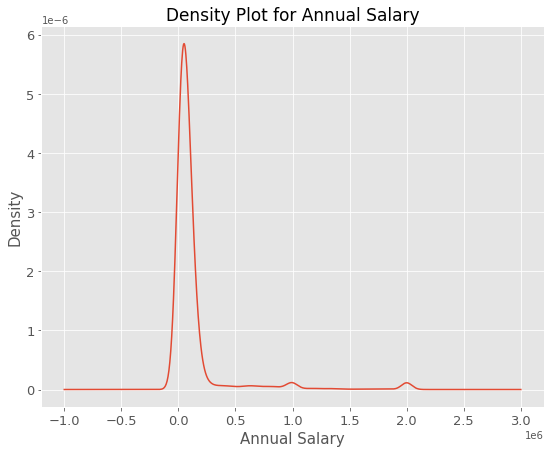

In [23]:
df['ConvertedComp'].plot.kde(figsize = (9, 7))
plt.title('Density Plot for Annual Salary', fontsize = 17)
plt.xlabel('Annual Salary', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

And below is a histogram:

<function matplotlib.pyplot.show(close=None, block=None)>

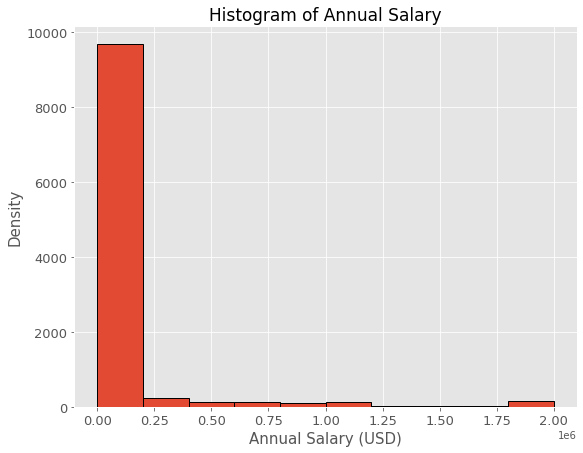

In [24]:
df['ConvertedComp'].plot(kind='hist', edgecolor='black', linewidth=1, figsize = (9,7))
plt.title('Histogram of Annual Salary', fontsize = 17)
plt.xlabel('Annual Salary (USD)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

Median of the column `ConvertedComp`:

In [25]:
df['ConvertedComp'].median()

57745.0

#### Gender and age distributions

Inspecting gender distribution:

In [26]:
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

So there was a high gender representation gap (in favor of men) among survey respondents.

Inspecting age distribution:

In [27]:
print(df['Age'].describe())
print("median:", df['Age'].median())

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64
median: 29.0


Histogram of `Age`:

<function matplotlib.pyplot.show(close=None, block=None)>

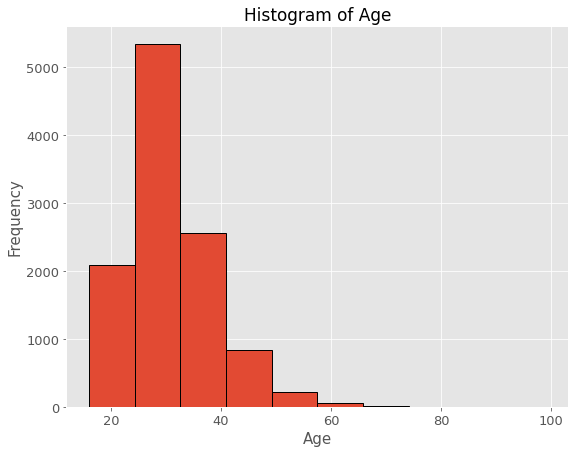

In [28]:
df['Age'].plot(kind='hist', edgecolor='black', linewidth=1, figsize = (9,7))
plt.title('Histogram of Age', fontsize = 17)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

### 4.2 Outliers <a class="anchor" id="chapter4.2"></a>

Next, I decided to detect and drop compensation outliers using the IQR method.

Box plot of annual salary:

<function matplotlib.pyplot.show(close=None, block=None)>

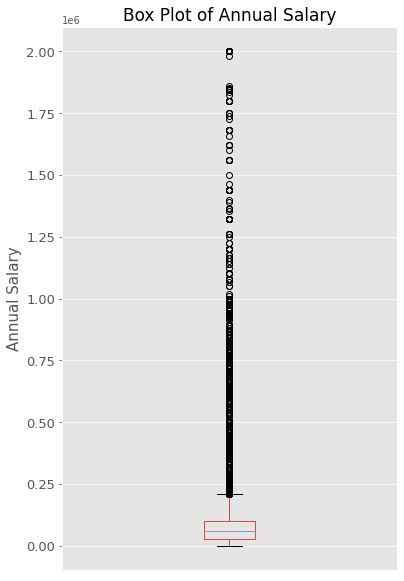

In [29]:
df['ConvertedComp'].plot(kind='box', figsize=(6, 10))
plt.title('Box Plot of Annual Salary', fontsize = 17)
plt.ylabel('Annual Salary', fontsize = 15)
plt.yticks(fontsize=13)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show

Inter-quartile range for annual salary:

In [30]:
# Upper and lower quartiles
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [31]:
# Inter-quartile range
q1 = 2.686800e+04
q3 = 1.000000e+05
iqr =  q3- q1
print("The inter-quartile range is", iqr)

The inter-quartile range is 73132.0


Number of outliers in annual salary:

In [32]:
# Lower bound
O1 = q1 - 1.5*iqr # Note that the lower bound is smaller than zero

# Upper bound
O2 = q3 + 1.5*iqr

# Detecting outliers
x = df['ConvertedComp'] < O1 # Note that there are no values smaller than the lower bound
y = df['ConvertedComp'] > O2

# Counting the number of outliers
x.sum() + y.sum()

879

Creating a new dataframe by removing the foregoing outliers:

In [33]:
df_outliers = df[df['ConvertedComp'] > O2]
df.drop(df_outliers.index, axis=0, inplace = True)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


Checking the new distribution of annual salaries after dropping outliers:

<function matplotlib.pyplot.show(close=None, block=None)>

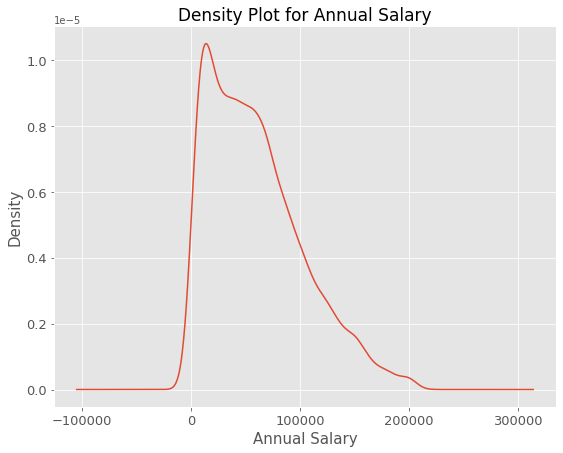

In [34]:
df['ConvertedComp'].plot.kde(figsize = (9, 7))
plt.title('Density Plot for Annual Salary', fontsize = 17)
plt.xlabel('Annual Salary', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

And the histogram:

<function matplotlib.pyplot.show(close=None, block=None)>

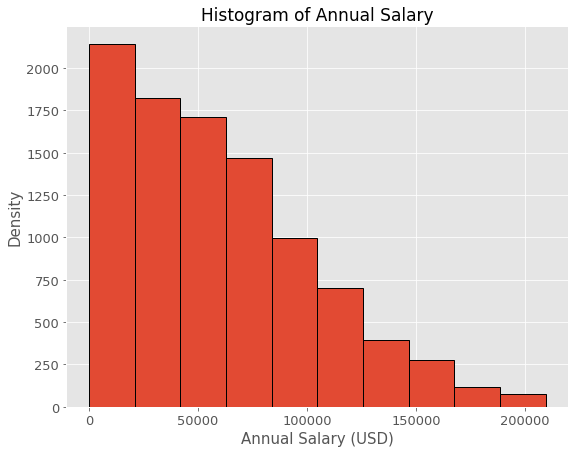

In [35]:
df['ConvertedComp'].plot(kind='hist', edgecolor='black', linewidth=1, figsize = (9, 7))

plt.title('Histogram of Annual Salary', fontsize = 17)
plt.xlabel('Annual Salary (USD)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

Checking the new median of annual salaries:

In [36]:
df['ConvertedComp'].median()

52704.0

At this point, I decided to compare the median salaries of men versus women:

In [37]:
# Median annual salary of responders identifying themselves only as a man:
print("Men:", df[df['Gender']=='Man']['ConvertedComp'].median())

# Median annual salary of responders identifying themselves only as a woman:
print("Women:", df[df['Gender']=='Woman']['ConvertedComp'].median())

Men: 52339.0
Women: 54956.0


So interestingly women have a slightly higher median annual salary in spite of the gender representation gap in favor of men.

### 4.3 Bivariate Correlations <a class="anchor" id="chapter4.3"></a>

Next, I wanted to observe the correlations between compensation, age, and all other numerical columns:

In [38]:
df.corr().round(2)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.00,-0.02,0.01,-0.02,0.00,0.00
CompTotal,-0.02,1.00,-0.06,0.00,0.02,0.01
ConvertedComp,0.01,-0.06,1.00,0.03,-0.09,0.40
WorkWeekHrs,-0.02,0.00,0.03,1.00,0.03,0.04
CodeRevHrs,0.00,0.02,-0.09,0.03,1.00,-0.02
Age,0.00,0.01,0.40,0.04,-0.02,1.00


There is a positive correlation between annual salary (i.e., "ConvertedComp") and Age (__*r* = .40__), which makes sense, given that older developers tend to have accrued more experience and thus hold higher-paid positions.

To demonstrate this positive correlation, I created a line plot of median annual salary by age:

In [39]:
# Creating a new dataframe of median annual salary grouped by age

df2 = df.groupby(['Age']).median()
df2.reset_index(inplace =True)
df2.head()

,Age,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
0,16.0,10544.0,1000.0,8700.0,40.0,1.0
1,17.0,18897.5,2250.0,43550.5,26.0,2.0
2,18.0,7580.0,15000.0,20936.0,35.0,3.0
3,19.0,11362.0,4550.0,17850.0,40.0,3.0
4,20.0,12234.0,8500.0,17820.0,40.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

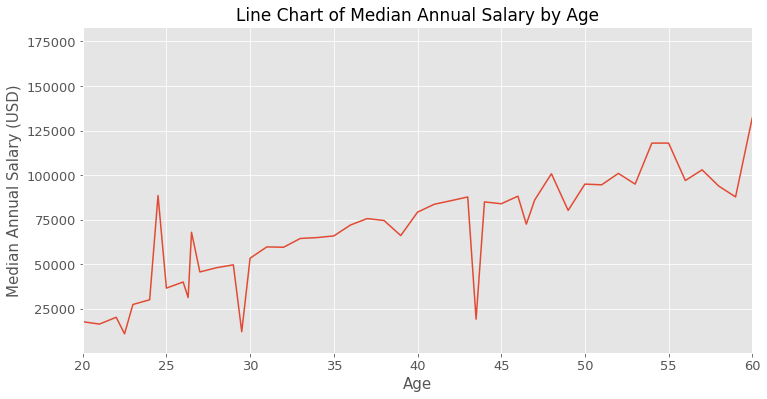

In [40]:
# Plotting median annual salary by age for those aged 20 to 60:

df2.plot(x="Age", y="ConvertedComp", figsize=(12, 6), legend = False)
plt.title('Line Chart of Median Annual Salary by Age', fontsize = 17)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Median Annual Salary (USD)', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim([20,60])
plt.show

The plot above is consistent with the positive correlation found between age and annual salary.

## 5. Analysis and Visualizations II: Technology Usage and Trends, Work Hours, and More <a class="anchor" id="chapter5"></a>

Finally I created additional visualizations, this time focusing on the technologies (i.e., languages, databases, platforms) used by developers in 2019 and desired for the next year, work hours, and other measures.

### 5.1 *SQL* Queries to Extract Data <a class="anchor" id="chapter5.1"></a>

For these visualizations, I used SQL queries on the cleaned dataset, provided by IBM in the form of a RDBMS.

Downloading the database file:

In [41]:
import urllib
urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite")

('C:\\Users\\diage\\AppData\\Local\\Temp\\tmp2n1qisd_',
 <http.client.HTTPMessage at 0x1d35e8a2e20>)

Connecting to the database:

In [42]:
import sqlite3
# Opening a database connection
conn = sqlite3.connect("m4_survey_data.sqlite") 

Number of rows in the "master" table:

In [43]:
QUERY = """
SELECT COUNT(*)
FROM master
"""

master = pd.read_sql_query(QUERY,conn)
master.head()

,COUNT(*)
0,11398


List of tables in the database:

In [44]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""

pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


### 5.2 Visualizations <a class="anchor" id="chapter5.2"></a>

#### Box plot of "age"

<function matplotlib.pyplot.show(close=None, block=None)>

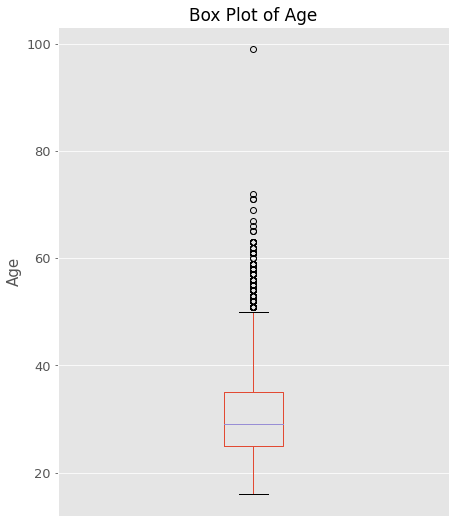

In [45]:
# SQL Query
Query = """
SELECT Age 
FROM master
"""

# Saving as pandas dataframe
Age= pd.read_sql_query(Query, conn)

# Plotting
Age.plot(kind='box', figsize=(7, 9))
plt.title('Box Plot of Age', fontsize = 17)
plt.ylabel('Age', fontsize = 15)
plt.yticks(fontsize=13)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show

#### Scatter plot of "work week hours" by "age"

<function matplotlib.pyplot.show(close=None, block=None)>

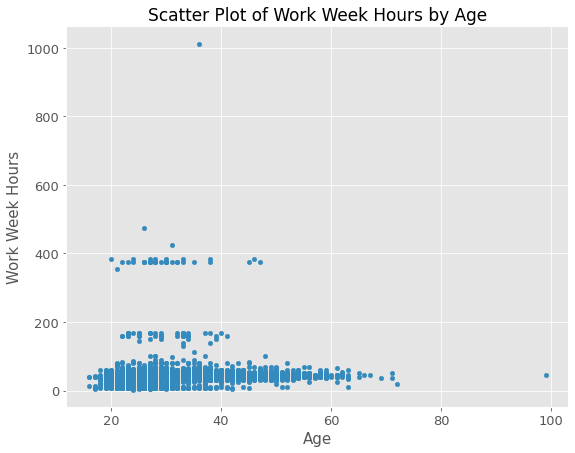

In [46]:
# SQL query
Query="""
SELECT Age, WorkWeekHrs
FROM master
"""

# Saving as pandas dataframe
Age_WorkWeekHrs=pd.read_sql_query(Query, conn)

# Plotting
Age_WorkWeekHrs.plot(kind='scatter', x="Age", y="WorkWeekHrs", figsize=(9, 7))
plt.title('Scatter Plot of Work Week Hours by Age', fontsize = 17)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Work Week Hours', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

#### Bubble plot of "code review hours" (i.e., hours spent per week on code reviews) by work week hours using age as bubble size

<function matplotlib.pyplot.show(close=None, block=None)>

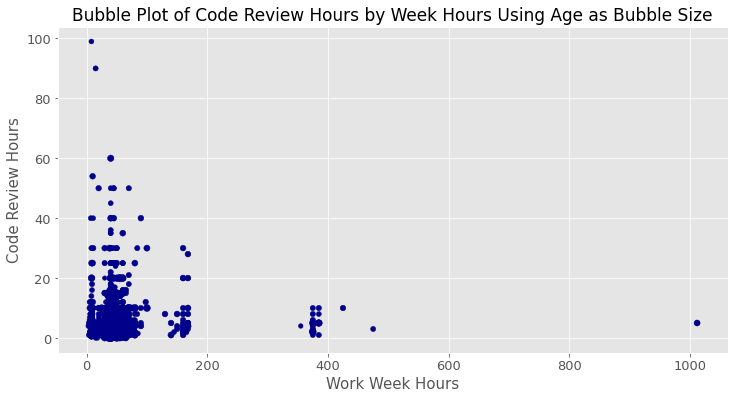

In [47]:
# SQL query
Query="""
SELECT Age, CodeRevHrs, WorkWeekHrs
FROM master
"""

# Saving as pandas dataframe
Age_Code_Work=pd.read_sql_query(Query, conn)

# Plotting
Age_Code_Work.plot(kind='scatter', x="WorkWeekHrs", y="CodeRevHrs", color='darkblue', s = 'Age', figsize=(12, 6))
plt.title('Bubble Plot of Code Review Hours by Week Hours Using Age as Bubble Size', fontsize = 17)
plt.xlabel('Work Week Hours', fontsize = 15)
plt.ylabel('Code Review Hours', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show

#### Stacked chart of median "work week hours" and "code review hours" for respondents aged 30 to 35


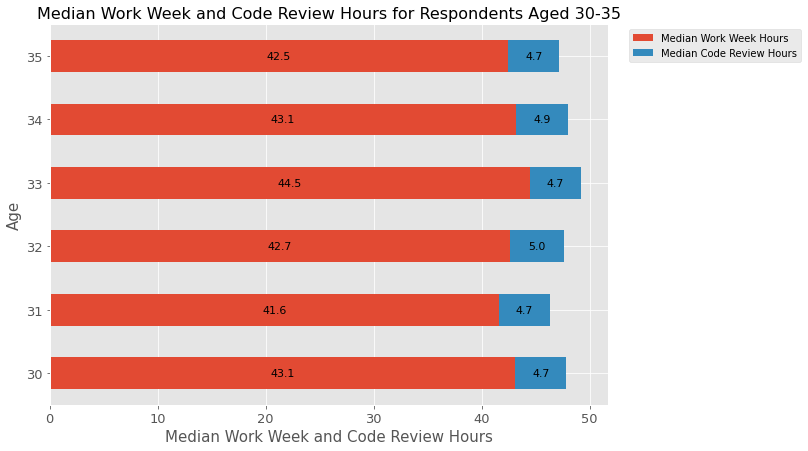

In [50]:
# SQL query
Query = """
SELECT Avg(WorkWeekHrs) as WorkWeekHrs_median, Avg(CodeRevHrs) as CodeRevHrs_median, Age 
FROM master 
where Age between 30 and 35
group by Age
"""

# Saving as pandas dataframe
median_hours = pd.read_sql_query(Query, conn)
median_hours.rename(columns={'WorkWeekHrs_median':'Median Work Week Hours','CodeRevHrs_median':'Median Code Review Hours'}, inplace = True) # Renaming columns
median_hours['Age'] = median_hours['Age'].astype(int) # Converting 'age' from float to integer
median_hours.set_index('Age', inplace=True) # Setting age as the index

# Plotting
ax = median_hours.plot(kind='barh', stacked = True, figsize =(10,7))

# Plotting: Showing values inside bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and is used as the label
    label_text = f'{width:.1f}'  # Format to 1 dp
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    
    # Show if width is greater than zero
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=11)

plt.title('Median Work Week and Code Review Hours for Respondents Aged 30-35', fontsize = 16)
plt.xlabel('Median Work Week and Code Review Hours', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(bbox_to_anchor=(1.03, 1.))
plt.show()

#### Bar chart of the ***top 5 most used languages*** in 2019

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Python'),
  Text(0, 1, 'Bash/Shell/PowerShell'),
  Text(0, 2, 'SQL'),
  Text(0, 3, 'HTML/CSS'),
  Text(0, 4, 'JavaScript')])

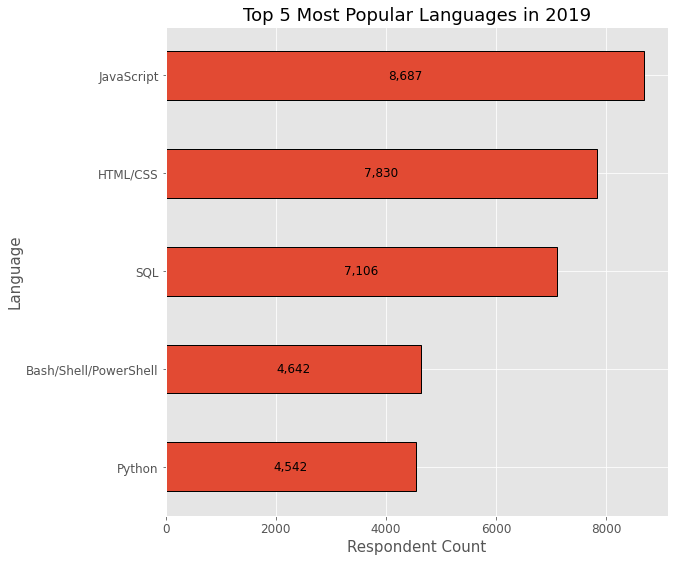

In [51]:
# SQL query
QUERY = """
SELECT LanguageWorkedWith, count(*) as Count
FROM LanguageWorkedWith
group by LanguageWorkedWith
order by count desc Limit 5
"""

# Saving as pandas dataframe
Language = pd.read_sql_query(QUERY,conn)

# Plotting
Language.set_index('LanguageWorkedWith', inplace = True)
Language = Language.sort_values("Count", axis = 0, ascending = True)
ax = Language.plot(kind='barh', legend = None, edgecolor='black', linewidth=1, figsize = (9, 9))

# Plotting: Showing values inside bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and is used as the label
    label_text = f'{width:,}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
        
plt.title('Top 5 Most Popular Languages in 2019', fontsize = 18)
plt.xlabel('Respondent Count', fontsize = 15)
plt.ylabel('Language', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### Bar chart of the ***top 5 most trending languages*** in 2019

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TypeScript'),
  Text(0, 1, 'SQL'),
  Text(0, 2, 'Python'),
  Text(0, 3, 'HTML/CSS'),
  Text(0, 4, 'JavaScript')])

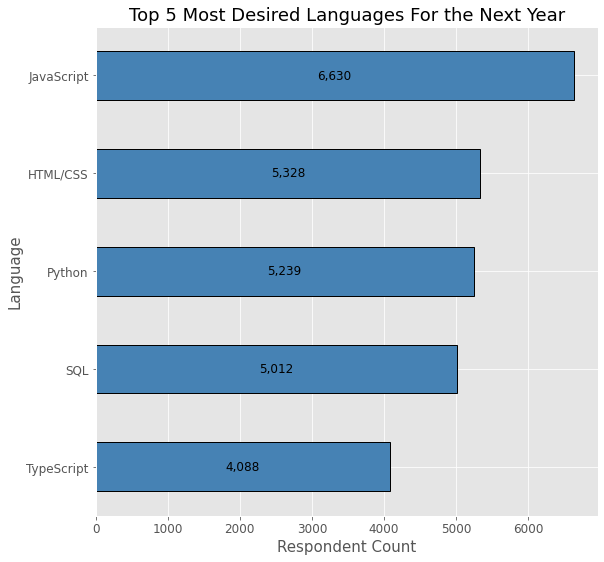

In [52]:
# SQL query
QUERY = """
SELECT LanguageDesireNextYear, count(*) as Count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc Limit 5
"""

# Saving as pandas dataframe
LanguageDesire = pd.read_sql_query(QUERY,conn)

# Plotting
LanguageDesire.set_index('LanguageDesireNextYear', inplace = True)
LanguageDesire = LanguageDesire.sort_values("Count", axis = 0, ascending = True)
ax = LanguageDesire.plot(kind='barh', legend = None, edgecolor='black', linewidth=1, figsize = (9, 9), color = 'steelblue')

# Plotting: Showing values inside bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and is used as the label
    label_text = f'{width:,}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)      

plt.title('Top 5 Most Desired Languages For the Next Year', fontsize = 18)
plt.xlabel('Respondent Count', fontsize = 15)
plt.ylabel('Language', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### Bar chart of the ***top 5 most used databases*** in 2019

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MongoDB'),
  Text(0, 1, 'SQLite'),
  Text(0, 2, 'PostgreSQL'),
  Text(0, 3, 'Microsoft SQL Server'),
  Text(0, 4, 'MySQL')])

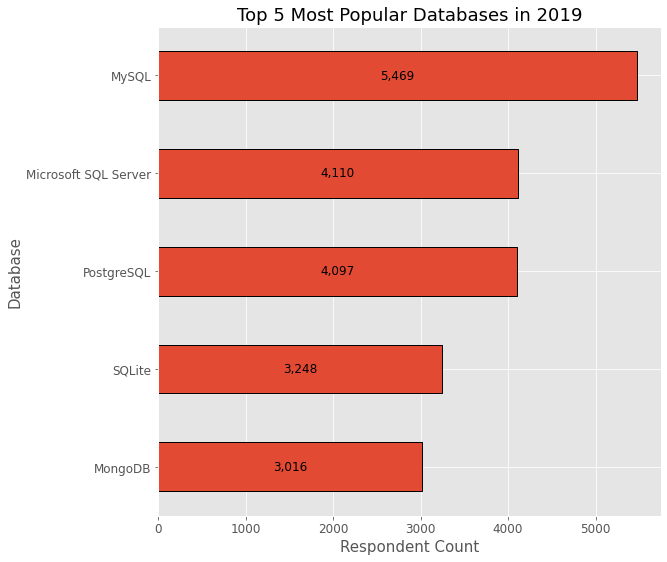

In [53]:
# SQL query
QUERY = """
SELECT DatabaseWorkedWith, count(*) as Count
FROM DatabaseWorkedWith
group by DatabaseWorkedWith
order by count desc Limit 5
"""

# Saving as pandas dataframe
Database = pd.read_sql_query(QUERY,conn)

# Plotting
Database.set_index('DatabaseWorkedWith', inplace = True)
Database = Database.sort_values("Count", axis = 0, ascending = True)
ax = Database.plot(kind='barh', legend = None, edgecolor='black', linewidth=1, figsize = (9, 9))

# Plotting: Showing values inside bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and is used as the label
    label_text = f'{width:,}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)  

plt.title('Top 5 Most Popular Databases in 2019', fontsize = 18)
plt.xlabel('Respondent Count', fontsize = 15)
plt.ylabel('Database', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### Bar chart of the ***top 5 most trending databases*** in 2019

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Elasticsearch'),
  Text(0, 1, 'MySQL'),
  Text(0, 2, 'Redis'),
  Text(0, 3, 'MongoDB'),
  Text(0, 4, 'PostgreSQL')])

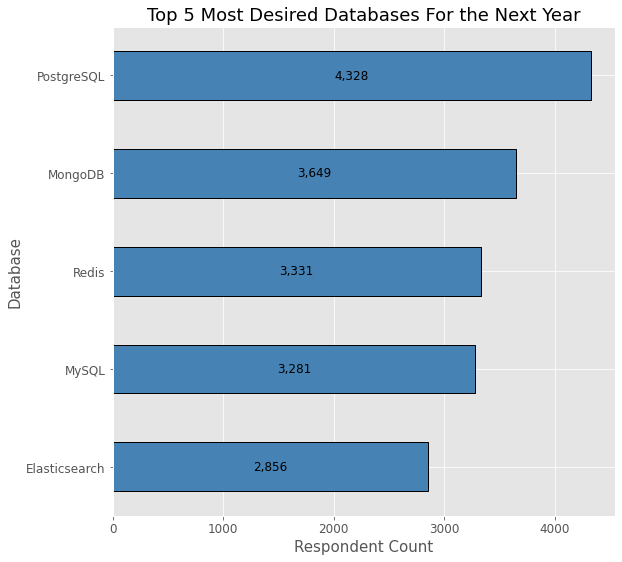

In [54]:
# SQL query
QUERY = """
SELECT DatabaseDesireNextYear, count(*) as Count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc Limit 5
"""

# Saving as pandas dataframe
DatabaseDesire = pd.read_sql_query(QUERY,conn)

# Plotting
DatabaseDesire.set_index('DatabaseDesireNextYear', inplace = True)
DatabaseDesire = DatabaseDesire.sort_values("Count", axis = 0, ascending = True)
ax = DatabaseDesire.plot(kind='barh', legend = None, edgecolor='black', linewidth=1, figsize = (9, 9), color = 'steelblue')

# Plotting: Showing values inside bars
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is the data value and is used as the label
    label_text = f'{width:,}'
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12) 

plt.title('Top 5 Most Desired Databases For the Next Year', fontsize = 18)
plt.xlabel('Respondent Count', fontsize = 15)
plt.ylabel('Database', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### Same as above (i.e., top 5 most trending databases in 2019) but as a pie chart

([<matplotlib.patches.Wedge at 0x1d35e65d3a0>,
 [Text(1.56492188720591, 1.5462921738610378, 'PostgreSQL'),
  Text(-1.322911707608751, 1.7578124512790603, 'MongoDB'),
  Text(-2.080323551695665, -0.7157191629824745, 'Redis'),
  Text(-0.10712667302019274, -2.197390242066171, 'MySQL'),
  Text(1.915375559793783, -1.0822829874596818, 'Elasticsearch')],
 [Text(0.853593756657769, 0.8434320948332933, '24.8%'),
  Text(-0.7215882041502277, 0.9588067916067601, '20.9%'),
  Text(-1.1347219372885444, -0.3903922707177134, '19.1%'),
  Text(-0.05843273073828694, -1.1985764956724567, '18.8%'),
  Text(1.0447503053420633, -0.5903361749780082, '16.4%')])

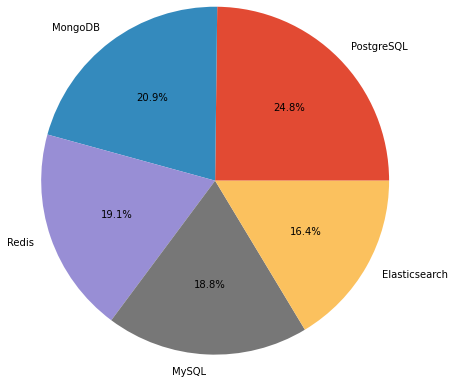

In [55]:
# SQL query
Query="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

# Saving as pandas dataframe
DatabaseDesireNextYear= pd.read_sql_query(Query, conn)

# Plotting
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=2)

Closing the connection

In [56]:
conn.close()

### 5.3 Dashboard Using *IBM Cognos* <a class="anchor" id="chapter5.3"></a>

I also used *IBM Cognos* to create an interactive dashboard summarizing (a) current technology use, (b) future technology trend, and (c) demographics of the survey respondents.

Link to the Cognos dashboard: [Summary Dashboard](https://eu-gb.dataplatform.cloud.ibm.com/dashboards/171ae20c-d010-40b8-8837-c0da7850a86b/view/0509dd3d6e9437df42b4f2e407c87f052c662c0fb4bb8305d1d07b490e337197f06c1490c87e4f0f8f430c30a6be440ac9 "Summary Dashboard")

## 6. Analysis and Visualizations III: Data from Sources Other than the Stack Overflow Developer Survey <a class="anchor" id="chapter6"></a>


In addition to the above, I created two additional visualizations using data from outside of the Stack Overflow Developer Survey. 

First, I collected current job data using the GitHub Jobs API, then plotted the number of job listings for a selection of popular programming languages.

Second, I plotted the average annual salaries for selected popular programming languages using data scraped from a webpage provided by IBM.

### 6.1 Job Data Collected Using the *GitHub Jobs* API <a class="anchor" id="chapter6.1"></a>

I collected the number of job postings for the following languages using the Github Jobs API:

-   C
-   C#
-   C++
-   Java
-   JavaScript
-   Python
-   Scala
-   Oracle
-   SQL Server
-   MySQL Server
-   PostgreSQL
-   MongoDB


In [57]:
import requests
baseurl = "https://jobs.github.com/positions.json"

I then wrote a function to get the number of jobs for the given technology:<br>
_Note:_ The API gives a maximum of 50 jobs per page.<br>

In [58]:
def get_number_of_jobs(technology):
    number_of_jobs = 0
    page=1
    new_results=1
    #your code goes here
    while new_results>0:
        payload={"description":technology,"page":page}
        r=requests.get(baseurl,payload)
        new_results =len(r.json())
        page+=1
        number_of_jobs+=(len(r.json()))
    
    return technology,number_of_jobs

Calling the function for Python to confirm that it is working:

In [60]:
print(get_number_of_jobs('python'))

('python', 44)


#### Storing the results in an excel file


Creating a python list of all selected technologies:

In [61]:
jobs=["C","C#","C++","Java","JavaScript","Python","Scala","Oracle","SQL Server","MySQL Server","PostgreSQL","MongoDB", "Tableau", "Power BI", "Azure", "AWS", "Excel"]

Importing libraries required to create excel spreadsheet:

In [62]:
from openpyxl import Workbook

Creating a workbook and selecting the active worksheet:

In [63]:
wb=Workbook()
ws=wb.active 

Finding the number of jobs postings for each of the technology in the above list and appending them to the excel worksheet:


In [ ]:
for i in jobs:
    ws.append(get_number_of_jobs(i))

Saving into an excel spreadsheet named 'github-job-postings.xlsx':


In [ ]:
wb.save("github_jobs.xlsx") 

Saving into a pandas dataframe:


In [64]:
df = pd.read_excel("github_jobs.xlsx")
df.set_index('Language', inplace = True)
df = df.sort_values("Count", axis = 0, ascending = True)
df.head()

,Count
Language,
Tableau,0
MongoDB,7
MySQL Server,8
Oracle,9
PostgreSQL,12


#### Bar chart of GitHub job postings for the selected technologies

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Tableau'),
  Text(0, 1, 'MongoDB'),
  Text(0, 2, 'MySQL Server'),
  Text(0, 3, 'Oracle'),
  Text(0, 4, 'PostgreSQL'),
  Text(0, 5, 'SQL Server'),
  Text(0, 6, 'C++'),
  Text(0, 7, 'C#'),
  Text(0, 8, 'Azure'),
  Text(0, 9, 'Scala'),
  Text(0, 10, 'Power BI'),
  Text(0, 11, 'Python'),
  Text(0, 12, 'AWS'),
  Text(0, 13, 'Excel'),
  Text(0, 14, 'JavaScript'),
  Text(0, 15, 'Java'),
  Text(0, 16, 'C')])

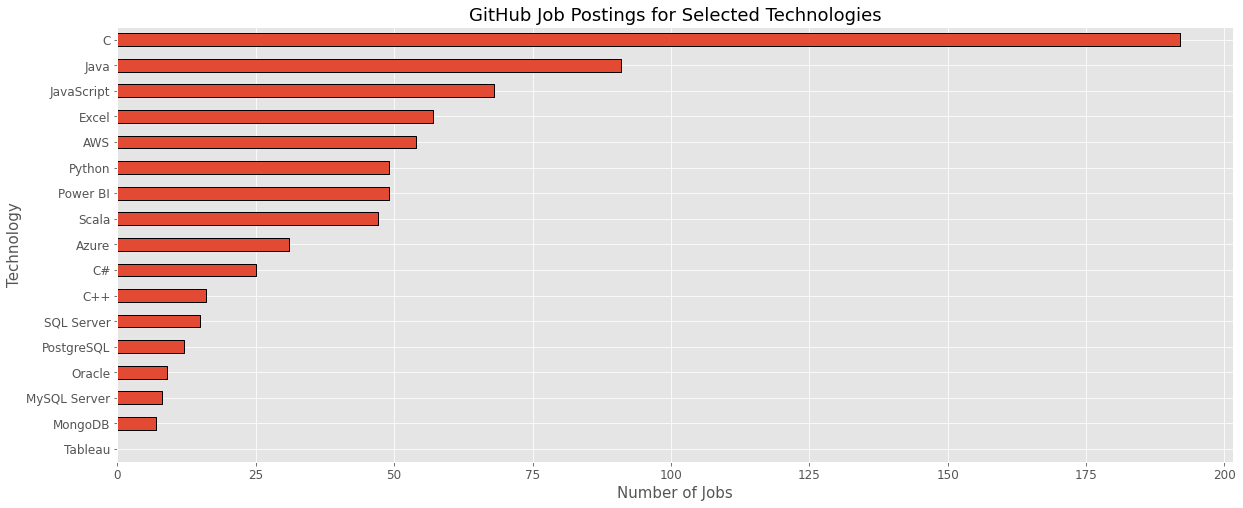

In [65]:
df.plot(kind='barh', legend = None, edgecolor='black', linewidth=1, figsize = (20, 8))
plt.title('GitHub Job Postings for Selected Technologies', fontsize = 18)
plt.xlabel('Number of Jobs', fontsize = 15)
plt.ylabel('Technology', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### 6.2 Webscraping Popular Languages and Respective Salary Data <a class="anchor" id="chapter6.2"></a>

I extracted data from the following web page provided by IBM:

In [66]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

Specifically, I scraped the **name of the programming language** and **average annual salary**.


Importing the required libraries:


In [67]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Downloading the webpage at the url:


In [68]:
data  = requests.get(url).text 

Creating a soup object:


In [69]:
soup = BeautifulSoup(data,"html5lib") 

Scraping the `Language name` and `annual average salary`:


In [70]:
table = soup.find('table')
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() 
    salary = cols[3].getText()
    print("{}--->{}".format(language,salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Saving the scrapped data into a file named _popular-languages.csv_:


In [71]:
l = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Getting all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() 
    salary = cols[3].getText()
    l.append([language, salary])
    
df = pd.DataFrame(l[1:], columns = ["Language", "Average Annual Salary"])
df.set_index('Language', inplace = True)
df

,Average Annual Salary
Language,
Python,"$114,383"
Java,"$101,013"
R,"$92,037"
Javascript,"$110,981"
Swift,"$130,801"
C++,"$113,865"
C#,"$88,726"
PHP,"$84,727"
SQL,"$84,793"


In [72]:
# Removing dollar signs
df['Average Annual Salary']= df['Average Annual Salary'].str.replace('$','')
df['Average Annual Salary']= df['Average Annual Salary'].str.replace(',','')

# Converting into integers
df=df.astype(int)

# Sorting values
df = df.sort_values("Average Annual Salary", axis = 0, ascending = False)
df

,Average Annual Salary
Language,
Swift,130801
Python,114383
C++,113865
Javascript,110981
Java,101013
Go,94082
R,92037
C#,88726
SQL,84793


#### Bar chart of annual salaries by popular programming languages

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

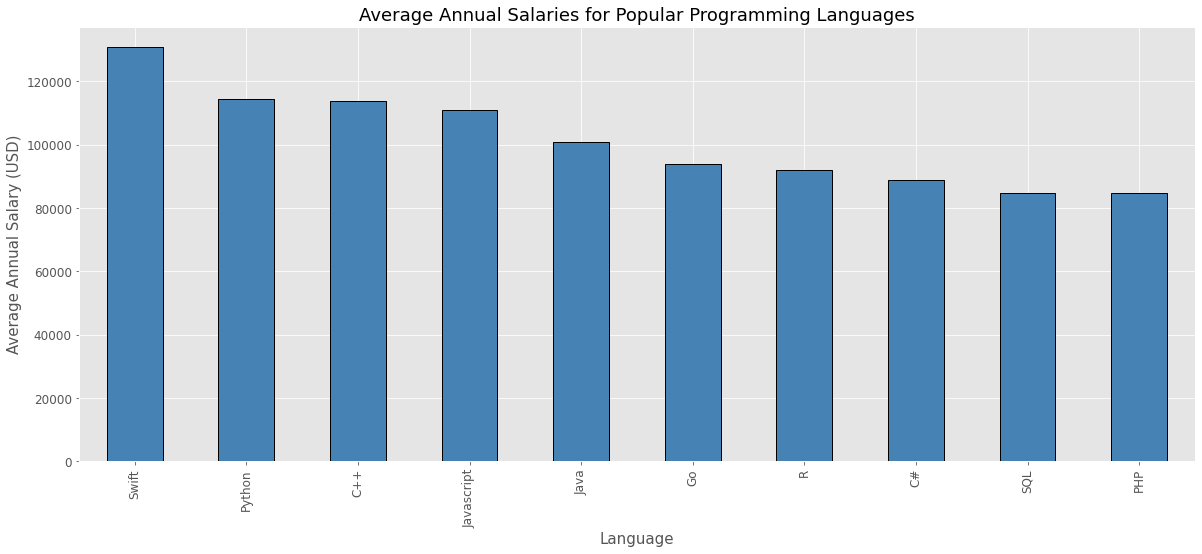

In [73]:
df.plot(kind='bar', legend = None, edgecolor='black', linewidth=1, figsize = (20, 8), color = 'steelblue')
plt.title('Average Annual Salaries for Popular Programming Languages', fontsize = 18)
plt.xlabel('Language', fontsize = 15)
plt.ylabel('Average Annual Salary (USD)', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## 7. Findings and Implications <a class="anchor" id="chapter7"></a>

Taken together, the analysis yielded insights into the following questions:

- What kinds of developer technologies are in top demand?
- Which technologies should prospective developers and data professionals be learning? 
- Which technologies should educators place more emphasis on teaching in upcoming years?
- What does the distribution of annual compensation for developers look like?
- What is the developer demographic like? Is there a gender representation gap? 


The findings and implications are discussed in more depth in a separate powerpoint presentation. To briefly summarize:

#### Findings



- High usage and interest in Javascript and HTML/CSS remain high usage. There’s also increasing interest in Typescript.-
- Increasing interest in Python.
- High usage and interest in SQL. MySQL had the highest usage in 2019, but PostgreSQL is gaining interest and was the overall most desired database program for the next year
- NoSQL database programs gaining interest, of which MongoDB was the most used in 2019 and desired for the next year. 
- A severe gender representation gap (in favor of men), despite median compensation being slightly higher for women.
- Technology divide between countries.

#### Implications

- Web development is still in high demand. Current and prospective developers may consider picking up Typescript in addition to Javascript and HTML/CSS. 
- With the growing need to handle big data and perform AI and ML work, data professionals should continue to enhance SQL competence but also enhance competence with NoSQL database programs and Python. 
- Businesses need to adapt to changing technology preferences, especially in terms of talent acquisition and development.    
- Policy makers, educators, and organizations should work to minimize the gender representation gap in addition to the technology divide between countries. 

### Thank you!

Created by Young Hun Ji